# Quantum Canny Edge Dectector Operators

This notebook presents some tools developed by [1] for use in their quantum canny edge detection circuit

## Integer Comparator

In [1]:
import utils
import operations

from qiskit import Aer, transpile
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister as cr
from qiskit.tools.visualization import plot_histogram

In [2]:
circuit = operations.quant_compare_int(5, 4)
print(circuit)

     ┌─────────┐                                                  
x_0: ┤0        ├──■────■────o────o────────────────────────────────
     │         │  │    │    │    │                                
x_1: ┤1 to_bin ├──┼────┼────┼────┼────■────■────o────o────────────
     │         │  │    │    │    │    │    │    │    │            
x_2: ┤2        ├──┼────┼────┼────┼────┼────┼────┼────┼────■────o──
     ├─────────┤  │    │    │    │    │    │    │    │    │    │  
y_0: ┤0        ├──o────o────■────■────┼────┼────┼────┼────┼────┼──
     │         │  │    │    │    │    │    │    │    │    │    │  
y_1: ┤1 to_bin ├──┼────┼────┼────┼────o────o────■────■────┼────┼──
     │         │  │    │    │    │    │    │    │    │    │    │  
y_2: ┤2        ├──┼────┼────┼────┼────┼────┼────┼────┼────o────■──
     └─────────┘  │  ┌─┴─┐  │    │    │    │    │    │    │    │  
a_0: ─────────────┼──┤ X ├──┼────┼────o────o────o────o────o────o──
                  │  └───┘  │  ┌─┴─┐  │    │    │    │    │   

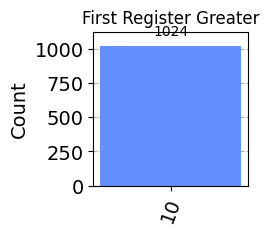

In [3]:
output_register = cr(2, 'c0')
circuit.add_register(output_register)
circuit.measure([circuit.num_qubits - 1, circuit.num_qubits - 2], output_register)
simulator = Aer.get_backend('aer_simulator')
circ = transpile(circuit, simulator)
result = simulator.run(circ).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='First Register Greater', figsize=(2,2))

In [4]:
circuit = operations.quant_compare_int(3, 7)
print(circuit)

     ┌─────────┐                                                  
x_0: ┤0        ├──■────■────o────o────────────────────────────────
     │         │  │    │    │    │                                
x_1: ┤1 to_bin ├──┼────┼────┼────┼────■────■────o────o────────────
     │         │  │    │    │    │    │    │    │    │            
x_2: ┤2        ├──┼────┼────┼────┼────┼────┼────┼────┼────■────o──
     ├─────────┤  │    │    │    │    │    │    │    │    │    │  
y_0: ┤0        ├──o────o────■────■────┼────┼────┼────┼────┼────┼──
     │         │  │    │    │    │    │    │    │    │    │    │  
y_1: ┤1 to_bin ├──┼────┼────┼────┼────o────o────■────■────┼────┼──
     │         │  │    │    │    │    │    │    │    │    │    │  
y_2: ┤2        ├──┼────┼────┼────┼────┼────┼────┼────┼────o────■──
     └─────────┘  │  ┌─┴─┐  │    │    │    │    │    │    │    │  
a_0: ─────────────┼──┤ X ├──┼────┼────o────o────o────o────o────o──
                  │  └───┘  │  ┌─┴─┐  │    │    │    │    │   

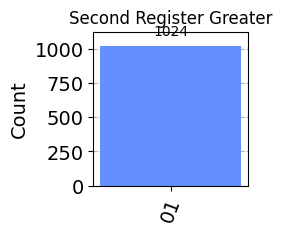

In [5]:
output_register = cr(2, 'c0')
circuit.add_register(output_register)
circuit.measure([circuit.num_qubits - 1, circuit.num_qubits - 2], output_register)
circ = transpile(circuit, simulator)
result = simulator.run(circ).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Second Register Greater', figsize=(2,2))

In [6]:
circuit = operations.quant_compare_int(3, 3)
print(circuit)

     ┌─────────┐                              
x_0: ┤0        ├──■────■────o────o────────────
     │  to_bin │  │    │    │    │            
x_1: ┤1        ├──┼────┼────┼────┼────■────o──
     ├─────────┤  │    │    │    │    │    │  
y_0: ┤0        ├──o────o────■────■────┼────┼──
     │  to_bin │  │    │    │    │    │    │  
y_1: ┤1        ├──┼────┼────┼────┼────o────■──
     └─────────┘  │  ┌─┴─┐  │    │    │    │  
a_0: ─────────────┼──┤ X ├──┼────┼────o────o──
                  │  └───┘  │  ┌─┴─┐  │    │  
a_1: ─────────────┼─────────┼──┤ X ├──o────o──
                ┌─┴─┐       │  └───┘┌─┴─┐  │  
e_0: ───────────┤ X ├───────┼───────┤ X ├──┼──
                └───┘     ┌─┴─┐     └───┘┌─┴─┐
e_1: ─────────────────────┤ X ├──────────┤ X ├
                          └───┘          └───┘


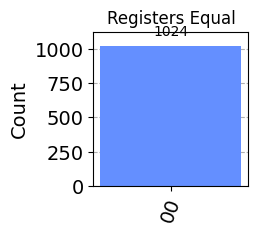

In [7]:
output_register = cr(2, 'c0')
circuit.add_register(output_register)
circuit.measure([circuit.num_qubits - 1, circuit.num_qubits - 2], output_register)
circ = transpile(circuit, simulator)
result = simulator.run(circ).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Registers Equal', figsize=(2,2))

In [3]:
print(operations.increment_state(4, as_circuit=True))

      ┌───┐               
q0_0: ┤ X ├───────────────
      └─┬─┘┌───┐          
q0_1: ──■──┤ X ├──────────
        │  └─┬─┘┌───┐     
q0_2: ──■────■──┤ X ├─────
        │    │  └─┬─┘┌───┐
q0_3: ──■────■────■──┤ X ├
                     └───┘


## References

[1] P. Li, “Quantum implementation of the classical canny edge detector,” Multimedia Tools and
Applications, vol. 81, pp. 11665 – 11694, 2022.
